<h1>Project: Combined cycle power plant performance</h1>

The goal of this project is to predict combined power plant output from ambient properties and exhaust vacuum.<br><br>

Supervised machine learning method implementation step are:
<ol>
  <li>EDA</li>
  <li>feature engineering</li>
  <li>feature selection</li>
  <li>regression</li>
  <li>discussion</li>
</ol>

<b>Abstract</b><br>
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load.

<b>Source</b><br>
Pınar Tüfekci, Çorlu Faculty of Engineering, Namık Kemal University, TR-59860 Çorlu, Tekirdağ, Turkey, email: ptufekci@nku.edu.tr

Heysem Kaya, Department of Computer Engineering, Boğaziçi University, TR-34342, Beşiktaş, İstanbul, Turkey, email: heysem@boun.edu.tr

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

<b>Data Set Information</b><br>

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

<b>Attribute Information</b><br>

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

<b>Relevant Papers, Citation Request</b><br>

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615.

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)

<b>Results</b><br>
Energy output was predicted with RMSE_train of 12.77 and RMSE_test of 15.68 MW. R2_train 0.96 and R2_test 0.95. RH doesn't influence energy output.

<h2>1. EDA</h2>

In [1]:
# importing libraries
from platform import python_version
import warnings

# for working with arrays and dataframes
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns # for plotting data
import scipy
import scipy.stats as stats # for Q-Q plots

# for validation and evelueation
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# for classification
import xgboost
from xgboost import XGBRegressor

In [2]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)
print('Sklearn version:',sklearn.__version__)
print('XGBoost version:',xgboost.__version__)

Python version: 3.7.14
NumPy version: 1.21.6
Pandas version: 1.3.5
SciPy version: 1.7.3
Sklearn version: 1.0.2
XGBoost version: 0.90


In [3]:
# settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [4]:
# importing the dataset
df = pd.read_excel("Folds5x2_pp.xlsx")
print(f"{df.shape[1]} columns, {df.shape[0]} rows")
# checking duplicated rows
print(f"{df.duplicated().sum()} duplicated rows")
print('Deleting duplicated rows...')
df.drop_duplicates(inplace=True)
print(f"{df.duplicated().sum()} duplicated rows")
df.head()

5 columns, 9568 rows
41 duplicated rows
Deleting duplicated rows...
0 duplicated rows


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
# showing data types
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [6]:
# making a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determining percentage of missing values (expressed as decimals)
# and displaying the result ordered by percent of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [7]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

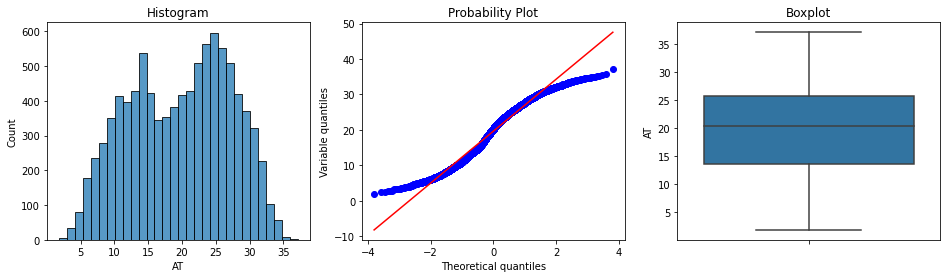

Skewnessis of AT is -0.14


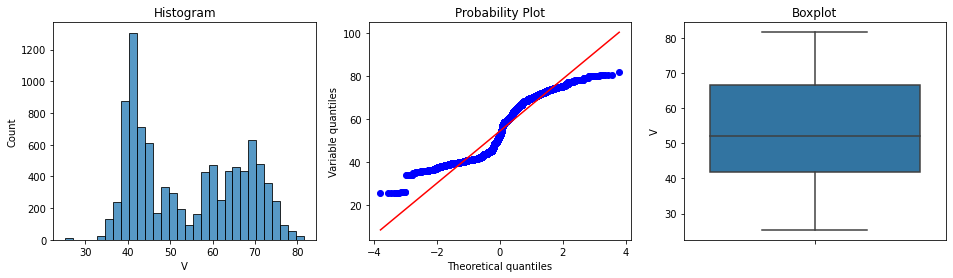

Skewnessis of V is 0.20


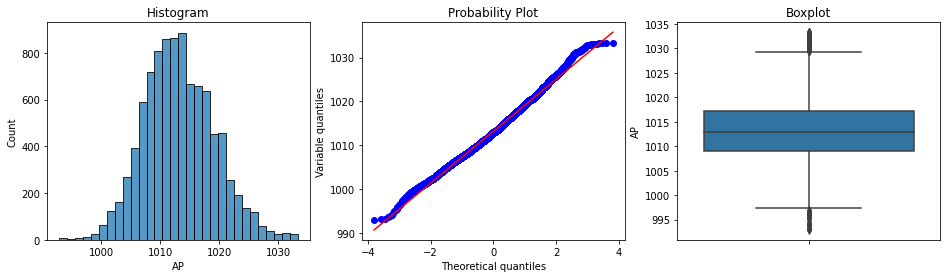

Skewnessis of AP is 0.27


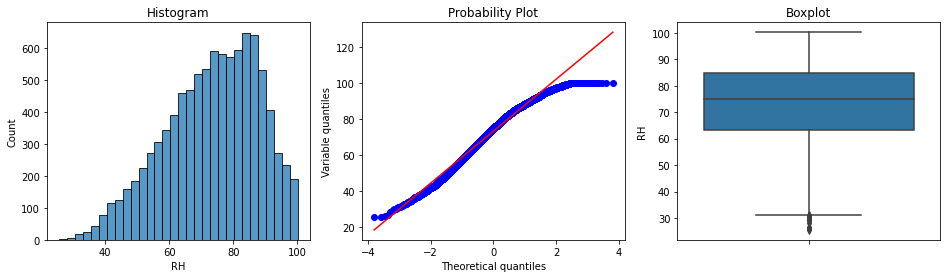

Skewnessis of RH is -0.44


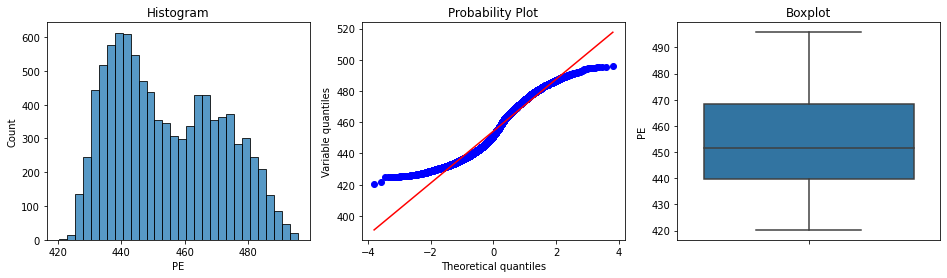

Skewnessis of PE is 0.31


In [8]:
# plotting the variables
for variable in df.columns:
    diagnostic_plots(df, variable)
    # printing skewness
    skewness = df[variable].skew()
    print("Skewnessis of", variable, "is {:.2f}".format(skewness))

Discussion: No outliers. Distributions close to normal.

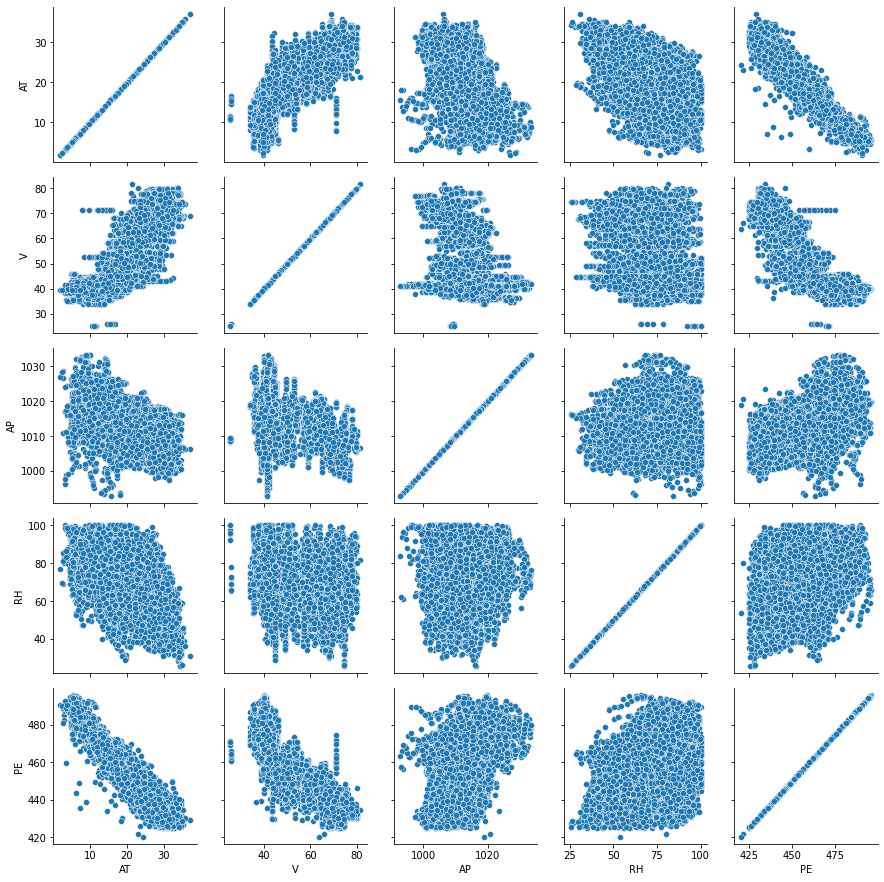

In [9]:
# plotting scatterplots with pairs of numerical variables
# w/o outliers in 'Tensile Strength (MPa)'
g = sns.PairGrid(df)
g.map(sns.scatterplot)

Discussion: 'AT' and 'V' have great influence on the target 'PE'. 'AT'-'PE' and scatter show possible outliers in left low area. 'V'-'PE' scatter show possible outliers: a line near 'V'=20 and and a line above the main 'swarm' near 'V'=70. This atipical distribution might be related to rare weather condition, to special operation mode or error in data.

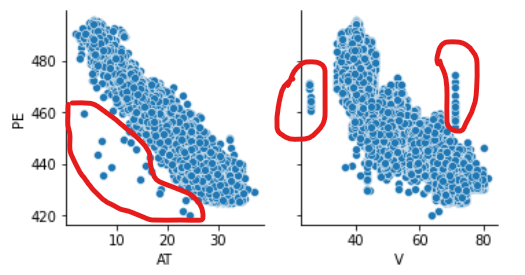

<h2>2. Feature Engineering</h2>

Features used as is. If results will be overfitted, then possibility of mentioned above possible outliers ro be an anomaly will grow.

<h2>3. Feature Selection</h2>

Feature shuffling

In [10]:
# writing list of features and the target
features = df.columns.to_list()[:-1]
target = df.columns.to_list()[-1]

In [11]:
# modeling with all the features

# defining X and y
X = df[features].values
y = df[target].values

# splitting the dataset to a train and a test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)

# defining a regressor
regressor_xg = XGBRegressor(max_depth=4, max_leaves=200, random_state = 42)

# applying k-fold cross validation
rmse = cross_val_score(estimator = regressor_xg,
                       X = X_train, y = y_train, cv = 10)
print()
print('Cross validation')
print("rmse: {:.2f} %".format(rmse.mean()*100))
print("Standard Deviation: {:.2f} %".format(rmse.std()*100))

# fitting the regressor and predicting y_test
regressor_xg.fit(X_train, y_train)
y_pred = regressor_xg.predict(X_test)

# evaluation
y_train_hat = regressor_xg.predict(X_train)
print()
print('Evaluation')
print(f"RMSE train: {mean_squared_error(y_train, y_train_hat):.2f}")
print(f"RMSE test : {mean_squared_error(y_test, y_pred):.2f}")
print(f"r2 train  : {r2_score(y_train, y_train_hat):.2f}")
print(f"r2 test   : {r2_score(y_test, y_pred):.2f}")

[01:26:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [12]:
# modeling with one variable shaffled per iteration
for var in features:
    df_shaffled = df.copy()
    df_shaffled[var] =  df_shaffled[var].sample(frac=1).values
    # defining X and y
    X = df_shaffled[features].values
    y = df_shaffled[target].values
    # splitting the dataset to a train and a test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.25, random_state = 42)
    # defining a regressor
    regressor_xg = XGBRegressor(max_depth=4, max_leaves=200, random_state = 42)
    # fitting the regressor and predicting y_test
    regressor_xg.fit(X_train, y_train)
    y_pred = regressor_xg.predict(X_test)
    # evaluation
    y_train_hat = regressor_xg.predict(X_train)
    print()
    print(f"Shuffled {var}")
    print(f"RMSE train: {mean_squared_error(y_train, y_train_hat):.2f}")
    print(f"RMSE test : {mean_squared_error(y_test, y_pred):.2f}")
    print(f"r2 train  : {r2_score(y_train, y_train_hat):.2f}")
    print(f"r2 test   : {r2_score(y_test, y_pred):.2f}")

[01:26:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled AT
RMSE train: 30.36
RMSE test : 34.14
r2 train  : 0.89
r2 test   : 0.88
[01:26:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled V
RMSE train: 16.52
RMSE test : 20.32
r2 train  : 0.94
r2 test   : 0.93
[01:26:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled AP
RMSE train: 13.29
RMSE test : 15.97
r2 train  : 0.95
r2 test   : 0.95
[01:26:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled RH
RMSE train: 12.92
RMSE test : 16.00
r2 train  : 0.96
r2 test   : 0.95


Discussion: 'RH' does not influence the target.

Removing 'RH'.

In [13]:
# defining X and y
model_vars = ['AT', 'V', 'AP']

<h2>4. Regression</h2>

In [14]:
# defining X and y
X = df[model_vars].values
y = df[target].values

# splitting the dataset to a train and a test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)

# defining a regressor
regressor_xg = XGBRegressor(max_depth=4, max_leaves=200, random_state = 42)

# applying k-fold cross validation
rmse = cross_val_score(estimator = regressor_xg,
                       X = X_train, y = y_train, cv = 10)
print()
print('Cross validation')
print("rmse: {:.2f} %".format(rmse.mean()*100))
print("Standard Deviation: {:.2f} %".format(rmse.std()*100))

# fitting the regressor and predicting y_test
regressor_xg.fit(X_train, y_train)
y_pred = regressor_xg.predict(X_test)

# evaluation
y_train_hat = regressor_xg.predict(X_train)
print()
print('Evaluation')
print(f"RMSE train: {mean_squared_error(y_train, y_train_hat):.2f}")
print(f"RMSE test : {mean_squared_error(y_test, y_pred):.2f}")
print(f"r2 train  : {r2_score(y_train, y_train_hat):.2f}")
print(f"r2 test   : {r2_score(y_test, y_pred):.2f}")

[01:26:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<h1>5. Discussion</h1>

With the selected features energy output was predicted with RMSE_train of 12.77 and RMSE_test of 15.68 MW. R2_train 0.96 and R2_test 0.95.